In [1]:
%matplotlib inline
import sys, re
import numpy as np
import pylab as pl
import pandas as pd
import csv
pd.options.display.max_rows = 4000
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from os import path
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import unicodedata
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
nltk.download('punkt')
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pd.options.display.max_rows = 4000
#Mac
#survey_data = pd.read_csv(r'/Volumes/GoogleDrive/Shared drives/MediSprout/data/survey_data.csv')
#PC
survey_data = pd.read_csv(r'G:\Shared drives\MediSprout\vishaal\MediSprout-notebooks\NLP Analysis\survey_data_nov2020')
survey_data

,id,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id,created_on,updated_on,is_mobile,platform,client_name,client_version,screen_size,connection_type,build_version,n_minute_duration
0,1,Clinician,17486,1,NaN,NaN,676,647.0,2019-03-19 17:56:05,2019-03-19 17:56:05,0,NaN,NaN,NaN,NaN,NaN,NaN,1.6667
1,2,Clinician,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:56,2019-03-20 17:35:56,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
2,3,Patient,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:57,2019-03-20 17:35:57,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
3,4,Patient,17490,0,NaN,NaN,237,87.0,2019-03-20 18:21:10,2019-03-20 18:21:10,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
4,5,Clinician,17490,0,NaN,shut down mid session,237,87.0,2019-03-20 18:21:38,2019-03-20 18:21:38,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184454,184455,Patient,316003,0,4.0,NaN,66404,215848.0,2020-11-16 22:59:35,2020-11-16 22:59:35,0,Mac OS X 10_13_6,Chrome,86.0.4240.193,1440 x 900,NaN,NaN,0.0167
184455,184456,Patient,316111,1,5.0,NaN,4045,305919.0,2020-11-16 22:59:56,2020-11-16 22:59:56,1,,NaN,NaN,NaN,NaN,NaN,21.0000
184456,184457,Patient,316100,1,4.0,NaN,65240,139736.0,2020-11-16 23:00:02,2020-11-16 23:00:02,1,,NaN,NaN,NaN,NaN,NaN,36.3167
184457,184458,Clinician,316113,1,4.0,NaN,4097,305937.0,2020-11-16 23:01:21,2020-11-16 23:01:21,1,,NaN,NaN,NaN,NaN,NaN,22.9167


**Summary Stats**

In [3]:
survey_data.groupby('source')['rating'].mean()

source
Clinician    3.867990
Patient      4.513693
Name: rating, dtype: float64

In [4]:
survey_data.groupby('source')['visit_id'].count()

source
Clinician     74516
Patient      109943
Name: visit_id, dtype: int64

In [5]:
survey_data.shape

(184459, 18)

In [6]:
summary_stats = pd.crosstab(survey_data[survey_data['source']=='Patient']['is_satisfied'].fillna('NaN'), survey_data['rating'].fillna('NaN'), normalize='index')
summary_stats

rating,1.0,2.0,3.0,4.0,5.0,NaN
is_satisfied,,,,,,
0,0.028167,0.019682,0.052397,0.157978,0.501837,0.239941
1,0.014171,0.006009,0.019785,0.052684,0.266163,0.641187


In [8]:
survey_data['rating'].dropna().astype(int)

103622    5
103640    5
103642    5
103653    4
103656    4
         ..
184454    4
184455    5
184456    4
184457    4
184458    3
Name: rating, Length: 55823, dtype: int32

In [9]:
survey_data.loc[survey_data['rating'] != int]

,id,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id,created_on,updated_on,is_mobile,platform,client_name,client_version,screen_size,connection_type,build_version,n_minute_duration
0,1,Clinician,17486,1,NaN,NaN,676,647.0,2019-03-19 17:56:05,2019-03-19 17:56:05,0,NaN,NaN,NaN,NaN,NaN,NaN,1.6667
1,2,Clinician,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:56,2019-03-20 17:35:56,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
2,3,Patient,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:57,2019-03-20 17:35:57,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
3,4,Patient,17490,0,NaN,NaN,237,87.0,2019-03-20 18:21:10,2019-03-20 18:21:10,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
4,5,Clinician,17490,0,NaN,shut down mid session,237,87.0,2019-03-20 18:21:38,2019-03-20 18:21:38,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184454,184455,Patient,316003,0,4.0,NaN,66404,215848.0,2020-11-16 22:59:35,2020-11-16 22:59:35,0,Mac OS X 10_13_6,Chrome,86.0.4240.193,1440 x 900,NaN,NaN,0.0167
184455,184456,Patient,316111,1,5.0,NaN,4045,305919.0,2020-11-16 22:59:56,2020-11-16 22:59:56,1,,NaN,NaN,NaN,NaN,NaN,21.0000
184456,184457,Patient,316100,1,4.0,NaN,65240,139736.0,2020-11-16 23:00:02,2020-11-16 23:00:02,1,,NaN,NaN,NaN,NaN,NaN,36.3167
184457,184458,Clinician,316113,1,4.0,NaN,4097,305937.0,2020-11-16 23:01:21,2020-11-16 23:01:21,1,,NaN,NaN,NaN,NaN,NaN,22.9167


In [10]:
rating_prop = survey_data['rating'].value_counts(normalize=True) * 100
rating_prop

5.0    67.242893
4.0    17.482041
3.0     6.970245
1.0     5.465489
2.0     2.608244
0.0     0.231088
Name: rating, dtype: float64

In [11]:
rating_count = survey_data['rating'].value_counts()
rating_count

5.0    37537
4.0     9759
3.0     3891
1.0     3051
2.0     1456
0.0      129
Name: rating, dtype: int64

In [12]:
rating_values = survey_data['rating'].value_counts().values
rating_values

array([37537,  9759,  3891,  3051,  1456,   129], dtype=int64)

In [15]:
survey_data['is_satisfied'].astype(int)

0         1
1         1
2         1
3         0
4         0
         ..
184454    0
184455    1
184456    1
184457    1
184458    1
Name: is_satisfied, Length: 184459, dtype: int32

In [17]:
satisfaction_count = survey_data['is_satisfied'].value_counts()
satisfaction_count

1    152304
0     32155
Name: is_satisfied, dtype: int64

In [23]:
pd.crosstab(survey_data['is_satisfied'].fillna('NaN'), survey_data['rating'].fillna('NaN'), normalize=True)

rating,0.0,1.0,2.0,3.0,4.0,5.0,NaN
is_satisfied,,,,,,,
0,0.000000,0.006462,0.003741,0.008376,0.020850,0.052499,0.082392
1,0.000699,0.010078,0.004153,0.012718,0.032056,0.150998,0.614977


In [24]:
pd.pivot_table(survey_data, values = 'is_satisfied', index = 'rating', dropna=False)

,is_satisfied
rating,
0.0,1.000000
1.0,0.609308
2.0,0.526099
3.0,0.602930
4.0,0.605902
5.0,0.742015


In [25]:
#satisfaction proportions per rating(1 to 5)
sat_v_rating = pd.crosstab(survey_data['is_satisfied'].fillna('NaN'), survey_data['rating'].fillna('NaN'),\
            margins=True, margins_name='Total', normalize='index')
sat_v_rating

rating,0.0,1.0,2.0,3.0,4.0,5.0,NaN
is_satisfied,,,,,,,
0,0.000000,0.037070,0.021459,0.048049,0.119608,0.301166,0.472648
1,0.000847,0.012206,0.005029,0.015403,0.038824,0.182878,0.744813
Total,0.000699,0.016540,0.007893,0.021094,0.052906,0.203498,0.697369


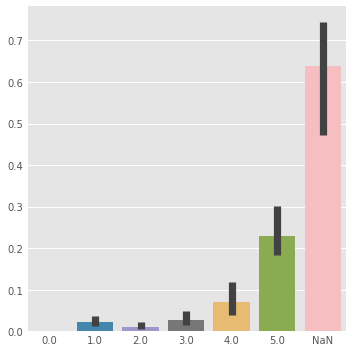

In [26]:
sns.catplot(data=sat_v_rating,kind='bar')

In [27]:
#patient vs clinician ratings
pat_v_clin_rating = pd.crosstab(survey_data['source'].fillna('NaN'), survey_data['rating'].fillna('NaN'), \
                        margins=True, margins_name='Total', normalize='index')
pat_v_clin_rating.div(pat_v_clin_rating.sum(axis=1), axis=0)

rating,0.0,1.0,2.0,3.0,4.0,5.0,NaN
source,,,,,,,
Clinician,0.001731,0.017889,0.008575,0.018023,0.037079,0.074883,0.841819
Patient,0.000000,0.015626,0.007431,0.023176,0.063633,0.290669,0.599465
Total,0.000699,0.016540,0.007893,0.021094,0.052906,0.203498,0.697369


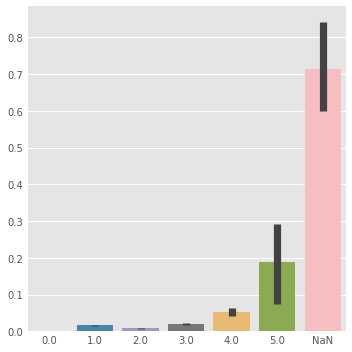

In [28]:
sns.catplot(data=pat_v_clin_rating,kind='bar')

In [29]:
#patient vs clinician satisfaction
pat_vs_clin_satisfaction = pd.crosstab(survey_data['source'].fillna('NaN'), survey_data['is_satisfied'].fillna('NaN'), \
                                       normalize='index')
pat_vs_clin_satisfaction[1].to_frame().reset_index()

,source,1
0,Clinician,0.721899
1,Patient,0.896019


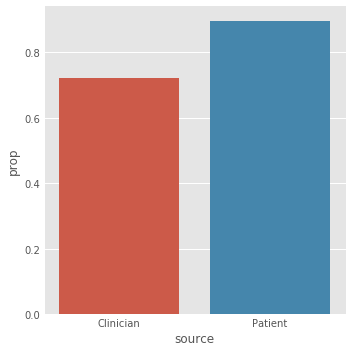

In [30]:
sns.catplot(data=pat_vs_clin_satisfaction[1].to_frame().reset_index().rename(columns={1: 'prop'}), x='source', y='prop',kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A93A990888>],
      dtype=object)

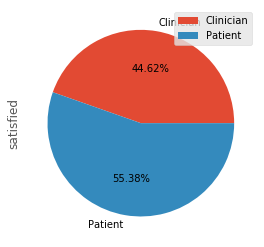

In [31]:
pat_vs_clin_satisfaction[1].to_frame().rename(columns={1: 'satisfied'}).plot(kind='pie', subplots=True, autopct='%1.2f%%')

In [32]:
survey_data.groupby('is_mobile')['is_satisfied'].mean().to_frame()

,is_satisfied
is_mobile,
0,0.538748
1,0.927646


Text(0, 0.5, 'avg satisfaction distribution')

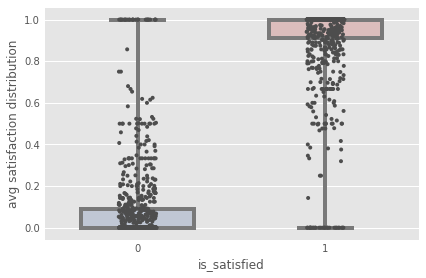

In [35]:
sns.boxplot(data=mobile_vs_desktop,
            whis=[0, 100], width=.6, palette="vlag", showfliers=False)
sns.stripplot(data=mobile_vs_desktop,
              size=4, color=".3", linewidth=0).set_ylabel('avg satisfaction distribution')

**Mobile vs Desktop Platforms**

In [36]:
#mobile platforms
pd.options.display.max_rows = 4000
only_mobile = survey_data[survey_data['is_mobile'] == 1]
platform = pd.crosstab(only_mobile['platform'].fillna('NaN'), only_mobile['is_mobile'].fillna('NaN'), \
                        normalize='all')
platform = pd.DataFrame(platform).reset_index()
new_mobile_df = platform.rename(columns={1: 'percentage'})
new_mobile_df
#new_df.nlargest(5, 'percentage', keep='all')

is_mobile,platform,percentage
0,,0.286800
1,ALCATEL 5046G,0.000007
2,ALCATEL A574BL,0.000022
3,ANS L51,0.000015
4,Acer B3-A30,0.000007
5,Alcatel 5041C,0.000007
6,Alcatel 5059S,0.000007
7,Alcatel A502DL,0.000015
8,Alcatel Alcatel_5008R,0.000015
9,Alcatel Alcatel_5059R,0.000007


In [38]:
def parent_desktop(row):
    platform = row['platform']
    
    if row['is_mobile'] == 0:
        if bool(re.search('Mac', str(platform))) == True:
            return 'Mac OS'
        elif bool(re.search('Linux', str(platform))) == True:
            return 'Linux'
        elif bool(re.search('Windows', str(platform))) == True:
            return 'Windows'
        else:
            return 'NaN'

In [39]:
def parent_device(row):
    platform = row['platform']
    
    if row['is_mobile'] == 1:
        if bool(re.search('iPhone', str(platform))) == True:
            return 'iPhone'
        elif bool(re.search('iPad', str(platform))) == True:
            return 'iPad'
        elif bool(re.search('samsung', str(platform))) == True:
            return 'samsung'
        elif bool(re.search('vivo', str(platform))) == True:
            return 'vivo'
        elif bool(re.search('lenovo', str(platform))) == True:
            return 'lenovo'
        elif bool(re.search('LG', str(platform))) == True:
            return 'LG'
        elif bool(re.search('motorola', str(platform))) == True:
            return 'motorola'
        elif bool(re.search('Pixel', str(platform))) == True:
            return 'Google Pixel'
        elif bool(re.search('OnePlus', str(platform))) == True:
            return 'OnePlus'
        elif bool(re.search('Yulong', str(platform))) == True:
            return 'Yulong'
        elif bool(re.search('LGE', str(platform))) == True:
            return 'LGE'
        elif bool(re.search('TCL', str(platform))) == True:
            return 'TCL'
        elif bool(re.search('ZTE', str(platform))) == True:
            return 'ZTE'
        elif bool(re.search('Xiaomi', str(platform))) == True:
            return 'Xiaomi'
        elif bool(re.search('AlcatelOneTouch', str(platform))) == True:
            return 'AlcatelOneTouch'
        elif bool(re.search('HUAWEI', str(platform))) == True:
            return 'HUAWEI'
        elif bool(re.search('Amazon', str(platform))) == True:
            return 'Amazon'
        elif bool(re.search('ALCATEL', str(platform))) == True:
            return 'ALCATEL'
        elif bool(re.search('TINNO', str(platform))) == True:
            return 'TINNO'
        elif bool(re.search('BLU', str(platform))) == True:
            return 'BLU'
        elif bool(re.search('Alco', str(platform))) == True:
            return 'Alco'
        elif bool(re.search('Innovations', str(platform))) == True:
            return 'Innovations'
        elif bool(re.search('HMD', str(platform))) == True:
            return 'HMD/Nokia'
        elif bool(re.search('Sony', str(platform))) == True:
            return 'Sony'
        elif bool(re.search('HTC', str(platform))) == True:
            return 'HTC'
        elif bool(re.search('LENOVO', str(platform))) == True:
            return 'LENOVO'
        elif bool(re.search('asus', str(platform))) == True:
            return 'asus'
        elif bool(re.search('Alco', str(platform))) == True:
            return 'Alco'
        elif bool(re.search('LENOVO', str(platform))) == True:
            return 'LENOVO'
        else:
            return 'Other'

In [40]:
def classify_mobile_type(row):
    platform = row['platform']
    
    if row['is_mobile'] == 1:
        if bool(re.match('Apple iP\w*', str(platform))) == True:
            return 'iOS'
        else:
            return 'Android'
    else:
        return 'NA'
    
    return row

In [41]:
#desktop platforms
desktops = survey_data[survey_data['is_mobile'] == 0]
is_mobile = survey_data[survey_data['is_mobile'] == 1]
desktops['parent_desktop'] = desktops.apply(lambda row: parent_desktop(row), axis=1)
desktops_df = desktops.groupby('parent_desktop')['visit_id'].count().to_frame().rename(columns={'visit_id': 'visits'})
desktops_df.assign(visit_prop = desktops_df['visits']/desktops_df['visits'].sum())\
.assign(satisfaction_rate = desktops.groupby('parent_desktop')['is_satisfied'].mean())\
.assign(num_feedback = desktops.groupby('parent_desktop')['feedback'].count())\
.assign(feedback_prop = desktops.groupby('parent_desktop')['feedback'].count()/desktops.groupby('parent_desktop')['feedback'].count().sum())

D:\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,visits,visit_prop,satisfaction_rate,num_feedback,feedback_prop
parent_desktop,,,,,
Linux,1236,0.025556,0.467638,285,0.026613
Mac OS,16010,0.331031,0.572142,3909,0.365020
NaN,197,0.004073,0.751269,39,0.003642
Windows,30921,0.639339,0.522946,6476,0.604725


In [42]:
desktops['feedback'].count()

10709

In [43]:
is_mobile['feedback'].count()

31414

In [44]:
#mobile platforms- fixed
is_mobile['platform'].value_counts()

                                                39032
Apple iPhone11,8                                 9166
Apple iPhone12,1                                 9076
Apple iPad7,11                                   5453
Apple iPhone12,5                                 4603
Apple iPhone9,1                                  4308
Apple iPhone12,3                                 4087
Apple iPhone11,6                                 3832
Apple iPhone10,1                                 3697
Apple iPhone10,3                                 3635
Apple iPhone10,2                                 2973
Apple iPhone11,2                                 2732
Apple iPhone8,1                                  2620
Apple iPhone10,6                                 2034
Apple iPhone10,5                                 1910
Apple iPhone10,4                                 1909
Apple iPhone7,2                                  1780
Apple iPhone9,2                                  1660
Apple iPhone9,4             

In [45]:
is_mobile['parent_device'] = is_mobile.apply(lambda row: parent_device(row), axis=1)
is_mobile['mobile_type'] = is_mobile.apply(lambda row: classify_mobile_type(row), axis=1)
is_mobile['parent_device'].value_counts()
#is_mobile.groupby('parent_device')['is_satisfied'].mean().to_frame()

D:\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


iPhone             65870
Other              39226
iPad               17534
samsung             9837
LG                  1883
motorola             622
Google Pixel         521
OnePlus              152
TCL                  148
ZTE                   62
Yulong                52
HUAWEI                40
Xiaomi                27
BLU                   22
HMD/Nokia             16
AlcatelOneTouch       13
Sony                  12
Amazon                11
LENOVO                11
HTC                   11
asus                   7
TINNO                  5
ALCATEL                4
Alco                   4
Innovations            3
vivo                   2
Name: parent_device, dtype: int64

In [46]:
is_mobile.groupby('parent_device')['feedback'].count().to_frame().apply(lambda row: row/row.sum())

,feedback
parent_device,
ALCATEL,0.000000
AlcatelOneTouch,0.000159
Alco,0.000064
Amazon,0.000159
BLU,0.000255
Google Pixel,0.004297
HMD/Nokia,0.000191
HTC,0.000159
HUAWEI,0.000318


In [47]:
is_mobile[is_mobile.feedback != 'NaN'].groupby('parent_device')['is_satisfied'].mean().to_frame()

,is_satisfied
parent_device,
ALCATEL,1.000000
AlcatelOneTouch,0.846154
Alco,0.750000
Amazon,0.909091
BLU,0.863636
Google Pixel,0.829175
HMD/Nokia,0.937500
HTC,1.000000
HUAWEI,0.900000


In [48]:
#mobile vs desktop platforms - needs to output both desktop and mobile platforms
platform = pd.crosstab(survey_data['platform'].fillna('NaN'), survey_data['is_mobile'].fillna('NaN'), \
                        margins=True, margins_name='Total', normalize='all')
platform.reset_index()

is_mobile,platform,0,1,Total
0,,0.000000,0.211603,0.211603
1,ALCATEL 5046G,0.000000,0.000005,0.000005
2,ALCATEL A574BL,0.000000,0.000016,0.000016
3,ANS L51,0.000000,0.000011,0.000011
4,Acer B3-A30,0.000000,0.000005,0.000005
5,Alcatel 5041C,0.000000,0.000005,0.000005
6,Alcatel 5059S,0.000000,0.000005,0.000005
7,Alcatel A502DL,0.000000,0.000011,0.000011
8,Alcatel Alcatel_5008R,0.000000,0.000011,0.000011
9,Alcatel Alcatel_5059R,0.000000,0.000005,0.000005


In [49]:
survey_data.groupby('is_mobile')['visit_id'].count().to_frame().apply(lambda row: row/row.sum())

,visit_id
is_mobile,
0,0.262194
1,0.737806


**MoM Analysis**

In [51]:
#avg satisfaction per month
survey_data['created_on'] = pd.to_datetime(survey_data['created_on'], format='%Y-%m-%d %H:%M:%S.%f')
survey_data['created_on_date'] = survey_data['created_on'].dt.date
survey_data['months'] = pd.to_datetime(survey_data['created_on'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m')
mom_satisfaction = pd.crosstab(survey_data['months'], survey_data['is_satisfied'], \
                        normalize='index')
cm = sns.light_palette("green", as_cmap=True)
mom_satisfaction = mom_satisfaction.reset_index().rename(columns={0:'not satisfied', 1:'satisfied'})[['months', 'satisfied']]\
#.style.background_gradient(cmap=cm)
mom_satisfaction 

is_satisfied,months,satisfied
0,2019-03,0.666667
1,2019-04,0.823529
2,2019-05,0.769231
3,2019-06,0.862069
4,2019-07,0.906667
5,2019-08,0.869565
6,2019-09,0.890244
7,2019-10,0.909091
8,2019-11,0.915254
9,2019-12,0.864407


In [52]:
cm = sns.light_palette("green", as_cmap=True)
pat_v_clinc_satisfaction = pd.crosstab([survey_data.query('is_satisfied == 1')['is_satisfied'], survey_data['months']], survey_data['source'],\
                        normalize=True)\
#.style.background_gradient(cmap=cm)
pat_v_clinc_satisfaction\
.reset_index()

source,is_satisfied,months,Clinician,Patient
0,1,2019-03,0.000046,0.000046
1,1,2019-04,0.000144,0.000223
2,1,2019-05,0.000184,0.000210
3,1,2019-06,0.000309,0.000184
4,1,2019-07,0.000164,0.000282
5,1,2019-08,0.000125,0.000138
6,1,2019-09,0.000269,0.000210
7,1,2019-10,0.000276,0.000315
8,1,2019-11,0.000125,0.000230
9,1,2019-12,0.000144,0.000190


Text(0.5, 0, 'months')

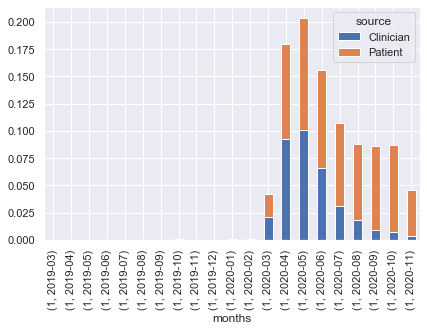

In [53]:
sns.set()
pat_v_clinc_satisfaction.plot.bar(stacked=True).set_xlabel('months')

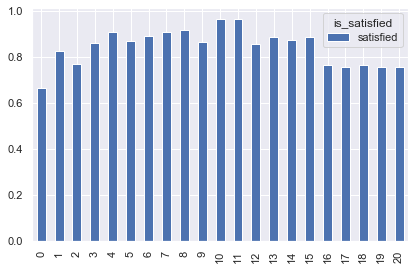

In [54]:
sns.set()
mom_satisfaction.plot.bar(stacked=True)

In [55]:
mom_feedback_count = survey_data.groupby(['months', 'source'])['feedback'].count().fillna(0).unstack()\
#.style.background_gradient(cmap=cm)
mom_feedback_count\
#.reset_index()

source,Clinician,Patient
months,,
2019-03,5,2
2019-04,5,16
2019-05,6,5
2019-06,14,10
2019-07,13,19
2019-08,4,2
2019-09,5,7
2019-10,3,4
2019-11,3,6


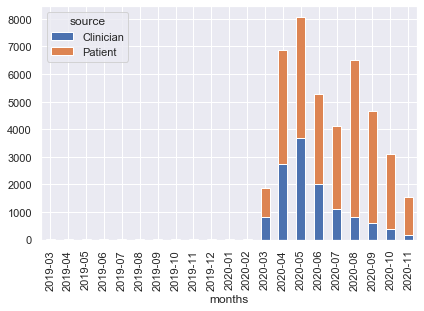

In [56]:
mom_feedback_count.plot.bar(stacked=True)

In [57]:
survey_data.groupby('months')['feedback'].count().to_frame()

,feedback
months,
2019-03,7
2019-04,21
2019-05,11
2019-06,24
2019-07,32
2019-08,6
2019-09,12
2019-10,7
2019-11,9


In [58]:
pat_v_clinc_satisfaction1 = survey_data.groupby(['months', 'source'])['is_satisfied'].mean().fillna(0).unstack()\
.reset_index()
#.style.background_gradient(cmap=cm)
pat_v_clinc_satisfaction1

source,months,Clinician,Patient
0,2019-03,0.636364,0.700000
1,2019-04,0.733333,0.894737
2,2019-05,0.622222,0.969697
3,2019-06,0.854545,0.875000
4,2019-07,0.806452,0.977273
5,2019-08,0.760000,1.000000
6,2019-09,0.891304,0.888889
7,2019-10,0.857143,0.960000
8,2019-11,0.863636,0.945946
9,2019-12,0.758621,0.966667


(0, 1)

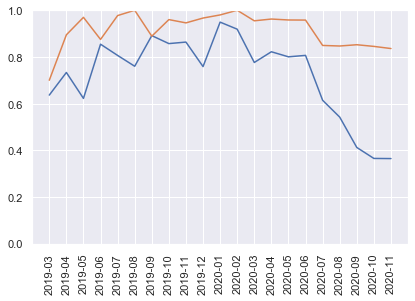

In [59]:
fig, ax = plt.subplots()
sns.set()
plt.plot(pat_v_clinc_satisfaction1['months'], pat_v_clinc_satisfaction1['Clinician'])
plt.plot(pat_v_clinc_satisfaction1['months'], pat_v_clinc_satisfaction1['Patient'])
plt.xticks(rotation=90)
ax.set_ylim(0,1)

In [61]:
clinician_sat = source_sat[['months', 'Clinician']].rename(columns={'Clinician': 'is_satisfied'})
patient_sat = source_sat[['months', 'Patient']].rename(columns={'Patient': 'is_satisfied'})
clinician_sat['source_type'] = 'Clinician'
patient_sat['source_type'] = 'Patient'
concat_sat = pd.concat([clinician_sat, patient_sat])
concat_sat

source,months,is_satisfied,source_type
0,2019-03,0.636364,Clinician
1,2019-04,0.733333,Clinician
2,2019-05,0.622222,Clinician
3,2019-06,0.854545,Clinician
4,2019-07,0.806452,Clinician
5,2019-08,0.760000,Clinician
6,2019-09,0.891304,Clinician
7,2019-10,0.857143,Clinician
8,2019-11,0.863636,Clinician
9,2019-12,0.758621,Clinician


In [62]:
mom_feedback_count = survey_data.groupby('months')['feedback'].count().to_frame().reset_index()
mom_feedback_count

,months,feedback
0,2019-03,7
1,2019-04,21
2,2019-05,11
3,2019-06,24
4,2019-07,32
5,2019-08,6
6,2019-09,12
7,2019-10,7
8,2019-11,9
9,2019-12,7


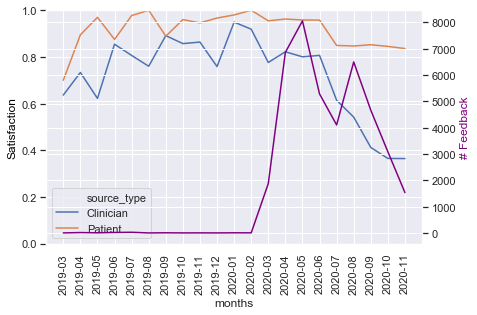

In [63]:
fig, ax = plt.subplots()
sns.set()
sns.lineplot(data=concat_sat, x='months', y='is_satisfied', hue='source_type')
ax.set_ylabel("Satisfaction",color="black", fontsize=12)
plt.xticks(rotation=90)
ax.set_ylim(0,1)

ax2 = ax.twinx()
ax2.plot(mom_feedback_count['months'], mom_feedback_count['feedback'], color='purple')
ax2.set_ylabel("# Feedback",color="purple",fontsize=12)
plt.show()

In [64]:
#avg rating per month
mom_rating = pd.crosstab(survey_data['months'], survey_data['rating'], \
                        margins=True, margins_name='Total', normalize='index')
cm = sns.light_palette("green", as_cmap=True)
mom_rating = mom_rating.reset_index()\
#.style.background_gradient(cmap=cm)
mom_rating

rating,months,0.0,1.0,2.0,3.0,4.0,5.0
0,2020-07,0.000000,0.085355,0.043291,0.100092,0.232730,0.538532
1,2020-08,0.009259,0.063092,0.027455,0.074720,0.179048,0.646425
2,2020-09,0.002572,0.061670,0.032659,0.078837,0.174243,0.650018
3,2020-10,0.000000,0.044688,0.018543,0.059084,0.166369,0.711316
4,2020-11,0.000000,0.041327,0.020881,0.057314,0.167047,0.713431
5,Total,0.002311,0.054655,0.026082,0.069702,0.174820,0.672429


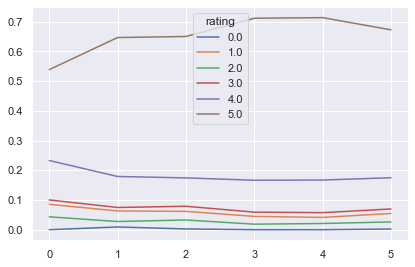

In [65]:
#don't know if we need this
sns.set()
mom_rating.plot()

In [66]:
survey_data[['created_on', 'rating']].dropna().head(100)

,created_on,rating
103622,2020-07-04 13:50:07,5.0
103640,2020-07-05 15:47:01,5.0
103642,2020-07-05 17:38:42,5.0
103653,2020-07-06 12:26:34,4.0
103656,2020-07-06 12:40:55,4.0
103659,2020-07-06 12:43:38,1.0
103661,2020-07-06 12:50:10,5.0
103662,2020-07-06 12:54:55,3.0
103670,2020-07-06 13:02:50,3.0
103677,2020-07-06 13:04:49,5.0


**Mobile vs Desktop Platforms Part 2**

In [68]:
mobile_platforms = pd.Series([item for item in survey_data['platform']\
                              .str.findall('^Apple iP\w*|^samsung\sSM-\w*|^Google\s[a-zA-Z]\w*\s\w\s\w*|^LGE\s\w*|^HTC\s\w*|^asus\s\w*|^motorola\s\w')])
mobile_platforms = mobile_platforms.str[0].dropna()
mobile_platforms

276       Apple iPhone10
277        Apple iPhone8
278        Apple iPhone8
282               LGE LG
283        Apple iPhone8
               ...      
176150     Apple iPhone9
178951       Apple iPad7
181059       Apple iPad7
181185       Apple iPad7
181262       Apple iPad7
Length: 95845, dtype: object

In [69]:
#apple
apple_ = pd.Series([item for item in survey_data['platform']\
                    .str.findall('^Apple iP\w*')])
apple_platforms = apple_.str[0].dropna().head(3000)
apple_platforms

276     Apple iPhone10
277      Apple iPhone8
278      Apple iPhone8
283      Apple iPhone8
284      Apple iPhone8
286      Apple iPhone8
287        Apple iPad4
288      Apple iPhone8
289        Apple iPad6
290      Apple iPhone8
292        Apple iPad7
294        Apple iPad7
296        Apple iPad7
300        Apple iPad5
301        Apple iPad6
310        Apple iPad7
314      Apple iPhone9
315     Apple iPhone11
318        Apple iPad7
320      Apple iPhone9
322      Apple iPhone8
326     Apple iPhone11
328      Apple iPhone9
329      Apple iPhone9
330     Apple iPhone10
348     Apple iPhone10
350     Apple iPhone11
358      Apple iPhone7
359        Apple iPad7
364     Apple iPhone11
370     Apple iPhone10
371      Apple iPhone6
374      Apple iPhone9
376      Apple iPhone9
378     Apple iPhone10
386     Apple iPhone10
387        Apple iPad7
391     Apple iPhone11
393      Apple iPhone7
398        Apple iPad7
401     Apple iPhone11
403      Apple iPhone9
404      Apple iPhone9
405      Ap

In [70]:
dimensions = survey_data['screen_size'].str.split('x').dropna().head(1000)
ss1 = dimensions.apply(lambda x:x[0]).astype(int)
ss2 = dimensions.apply(lambda x:x[1]).astype(int)
total_res = ss1 * ss2

In [71]:
def classify_device_type(row):
    platform = row['platform']
    tot_res = row['total_resolution']
    
    if bool(re.match('Apple iPad\w*', platform)) == True and tot_res >= 1425636.0:
        row['device_type'] = 'Tablet'
    else:
        row['device_type'] = np.where(tot_res < 547800.0, 'Phone',\
                                            np.where(tot_res > 927408.0, 'Desktop', 'Tablet'))
    return row

In [72]:
def classify_mobile_type(row):
    platform = row['platform']
    
    if row['is_mobile'] == 1:
        if bool(re.match('Apple iP\w*', platform)) == True:
            row['mobile_type'] = 'iOS'
        else:
            row['mobile_type'] = 'Android'
    else:
        row['mobile_type'] = 'NA'
    
    return row

#change returns

In [73]:
#resolution by device type
displays_df = pd.DataFrame\
({'id': survey_data['id'], 'platform': survey_data['platform'],\
  'screen_size': survey_data['screen_size'],'ss1':ss1,'ss2':ss2, 'total_resolution': total_res, \
  'build_version': survey_data['build_version'],\
  'client_name': survey_data['client_name'], \
  'source': survey_data['source'], 'is_satisfied': survey_data['is_satisfied'], \
  'is_mobile': survey_data['is_mobile'], 'feedback': survey_data['feedback'], \
  'n_minute_duration': survey_data['n_minute_duration']}).dropna()
displays_df['rating'] = survey_data['rating']
displays_df

,id,platform,screen_size,ss1,ss2,total_resolution,build_version,client_name,source,is_satisfied,is_mobile,feedback,n_minute_duration,rating
276,277,"Apple iPhone10,3",375 x 812,375.0,812.0,304500.0,3.9,iPhone (3),Patient,1,1,experience was good,7.4333,NaN
277,278,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice experience,7.4333,NaN
278,279,"Apple iPhone8,1",375 x 667,375.0,667.0,250125.0,3.9,Lalu’s Phone,Patient,1,1,nice calling,7.4333,NaN
280,281,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,Patient,1,1,nice,2.0333,NaN
281,282,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,Patient,1,1,good,2.0333,NaN
282,283,LGE LG-H818,360 x 598,360.0,598.0,215280.0,7.8,LG-H818,Patient,1,1,nice experience on android,2.0333,NaN
284,285,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice,2.0333,NaN
285,286,LENOVO Lenovo TAB 2 A8-50LC,600 x 913,600.0,913.0,547800.0,7.8,Lenovo TAB 2 A8-50LC,Patient,1,1,nice,0.0000,NaN
286,287,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice,0.0000,NaN
287,288,"Apple iPad4,4",768 x 1024,768.0,1024.0,786432.0,3.9,ios’s iPad,Patient,1,1,nice on ipad,0.0000,NaN


In [74]:
classify_mobile_type(displays_df.loc[277])

D:\New folder\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\New folder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


id                               278
platform             Apple iPhone8,1
screen_size                375 x 375
ss1                              375
ss2                              375
total_resolution              140625
build_version                    3.8
client_name             Lalu’s Phone
source                     Clinician
is_satisfied                       1
is_mobile                          1
feedback             nice experience
n_minute_duration             7.4333
rating                           NaN
mobile_type                      iOS
Name: 277, dtype: object

In [75]:
devices = pd.DataFrame(displays_df.apply(lambda row: classify_device_type(row), axis=1))
devices = devices.apply(lambda row: classify_mobile_type(row), axis=1)
devices

,id,platform,screen_size,ss1,ss2,total_resolution,build_version,client_name,source,is_satisfied,is_mobile,feedback,n_minute_duration,rating,device_type,mobile_type
276,277,"Apple iPhone10,3",375 x 812,375.0,812.0,304500.0,3.9,iPhone (3),Patient,1,1,experience was good,7.4333,NaN,Phone,iOS
277,278,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice experience,7.4333,NaN,Phone,iOS
278,279,"Apple iPhone8,1",375 x 667,375.0,667.0,250125.0,3.9,Lalu’s Phone,Patient,1,1,nice calling,7.4333,NaN,Phone,iOS
280,281,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,Patient,1,1,nice,2.0333,NaN,Phone,Android
281,282,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,Patient,1,1,good,2.0333,NaN,Phone,Android
282,283,LGE LG-H818,360 x 598,360.0,598.0,215280.0,7.8,LG-H818,Patient,1,1,nice experience on android,2.0333,NaN,Phone,Android
284,285,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice,2.0333,NaN,Phone,iOS
285,286,LENOVO Lenovo TAB 2 A8-50LC,600 x 913,600.0,913.0,547800.0,7.8,Lenovo TAB 2 A8-50LC,Patient,1,1,nice,0.0000,NaN,Tablet,Android
286,287,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice,0.0000,NaN,Phone,iOS
287,288,"Apple iPad4,4",768 x 1024,768.0,1024.0,786432.0,3.9,ios’s iPad,Patient,1,1,nice on ipad,0.0000,NaN,Tablet,iOS


In [76]:
devices.shape

(103, 16)

In [77]:
devices['parent_device'] = devices.apply(lambda row: parent_device(row), axis=1)
devices.groupby('parent_device')['feedback'].count()

parent_device
LENOVO      1
LG          1
iPad       17
iPhone     72
samsung    10
vivo        2
Name: feedback, dtype: int64

In [81]:
#iOS v. Android
mobile_only = pd.DataFrame(devices[devices['is_mobile'] == 1]).reset_index()

mobile_client_prop = pd.crosstab(mobile_only['mobile_type'], mobile_only['is_satisfied'], \
                        margins=True, margins_name='Total', normalize='index')
mobile_client_prop

is_satisfied,0,1
mobile_type,,
Android,0.142857,0.857143
iOS,0.314607,0.685393
Total,0.291262,0.708738


In [82]:
mobile_only.groupby('mobile_type')['feedback'].count()

mobile_type
Android    14
iOS        89
Name: feedback, dtype: int64

**Visit Duration Analysis**

In [135]:
#visit duration v feedback (is satisfied), call describe() to look at distributions - data.groupby('is_satisfied')['n_minute_duration'].describe()
#data.groupby('rating')['n_minute_duration'].describe()
#try to figure out short, medium, and long durations - define the thresholds - by feedback given(based off rating and is_satisfied) and by duration


In [136]:
devices['n_minute_duration'].describe()

count    103.000000
mean      14.392391
std       15.651898
min        0.000000
25%        3.875000
50%        9.316700
75%       18.800000
max       71.183300
Name: n_minute_duration, dtype: float64

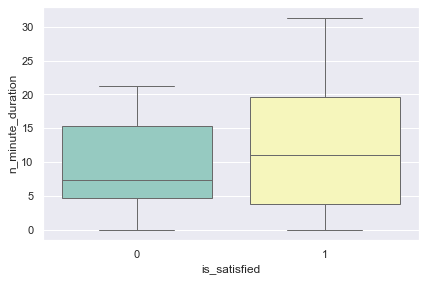

In [85]:
ax = sns.boxplot(x=devices['is_satisfied'], y=devices['n_minute_duration'], palette='Set3', linewidth=1, showfliers=False)
#ax = sns.swarmplot(x=devices['is_satisfied'], y=devices['n_minute_duration'], color=".25")
#run value_counts on is_satisfied

In [86]:
devices['n_minute_duration'].describe(include='all')

count    103.000000
mean      14.392391
std       15.651898
min        0.000000
25%        3.875000
50%        9.316700
75%       18.800000
max       71.183300
Name: n_minute_duration, dtype: float64

In [87]:
SHORT, MEDIUM, LONG = devices['n_minute_duration'].describe(include='all').loc[['25%', '50%', '75%']]

In [88]:
def duration_intervals(row):
    duration = row['n_minute_duration']
    if duration <= SHORT:
        return 'short'
    elif duration <= LONG:
        return 'medium'
    else:
        return 'long'

#return columns, not entire row

In [89]:
duration_intervals(devices.loc[276])

'medium'

In [90]:
SHORT, MEDIUM, LONG = devices['n_minute_duration'].describe(include='all').loc[['25%', '50%', '75%']]
print([SHORT, MEDIUM, LONG])

[3.875, 9.3167, 18.8]


In [91]:
#create a new column in df, devices['duration_interval'] = 
devices['duration_type'] = devices.apply(lambda row: duration_intervals(row), axis=1)
devices

,id,platform,screen_size,ss1,ss2,total_resolution,build_version,client_name,source,is_satisfied,is_mobile,feedback,n_minute_duration,rating,device_type,mobile_type,parent_device,duration_type
276,277,"Apple iPhone10,3",375 x 812,375.0,812.0,304500.0,3.9,iPhone (3),Patient,1,1,experience was good,7.4333,NaN,Phone,iOS,iPhone,medium
277,278,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice experience,7.4333,NaN,Phone,iOS,iPhone,medium
278,279,"Apple iPhone8,1",375 x 667,375.0,667.0,250125.0,3.9,Lalu’s Phone,Patient,1,1,nice calling,7.4333,NaN,Phone,iOS,iPhone,medium
280,281,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,Patient,1,1,nice,2.0333,NaN,Phone,Android,vivo,short
281,282,vivo vivo 1601,360 x 640,360.0,640.0,230400.0,7.8,vivo 1601,Patient,1,1,good,2.0333,NaN,Phone,Android,vivo,short
282,283,LGE LG-H818,360 x 598,360.0,598.0,215280.0,7.8,LG-H818,Patient,1,1,nice experience on android,2.0333,NaN,Phone,Android,LG,short
284,285,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice,2.0333,NaN,Phone,iOS,iPhone,short
285,286,LENOVO Lenovo TAB 2 A8-50LC,600 x 913,600.0,913.0,547800.0,7.8,Lenovo TAB 2 A8-50LC,Patient,1,1,nice,0.0000,NaN,Tablet,Android,LENOVO,short
286,287,"Apple iPhone8,1",375 x 375,375.0,375.0,140625.0,3.8,Lalu’s Phone,Clinician,1,1,nice,0.0000,NaN,Phone,iOS,iPhone,short
287,288,"Apple iPad4,4",768 x 1024,768.0,1024.0,786432.0,3.9,ios’s iPad,Patient,1,1,nice on ipad,0.0000,NaN,Tablet,iOS,iPad,short


In [92]:
survey_data['duration_type'] = survey_data.apply(lambda row: duration_intervals(row), axis=1)
survey_data

,id,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id,created_on,updated_on,...,platform,client_name,client_version,screen_size,connection_type,build_version,n_minute_duration,created_on_date,months,duration_type
0,1,Clinician,17486,1,NaN,NaN,676,647.0,2019-03-19 17:56:05,2019-03-19 17:56:05,...,NaN,NaN,NaN,NaN,NaN,NaN,1.6667,2019-03-19,2019-03,short
1,2,Clinician,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:56,2019-03-20 17:35:56,...,NaN,NaN,NaN,NaN,NaN,NaN,22.7667,2019-03-20,2019-03,long
2,3,Patient,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:57,2019-03-20 17:35:57,...,NaN,NaN,NaN,NaN,NaN,NaN,22.7667,2019-03-20,2019-03,long
3,4,Patient,17490,0,NaN,NaN,237,87.0,2019-03-20 18:21:10,2019-03-20 18:21:10,...,NaN,NaN,NaN,NaN,NaN,NaN,52.0500,2019-03-20,2019-03,long
4,5,Clinician,17490,0,NaN,shut down mid session,237,87.0,2019-03-20 18:21:38,2019-03-20 18:21:38,...,NaN,NaN,NaN,NaN,NaN,NaN,52.0500,2019-03-20,2019-03,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184454,184455,Patient,316003,0,4.0,NaN,66404,215848.0,2020-11-16 22:59:35,2020-11-16 22:59:35,...,Mac OS X 10_13_6,Chrome,86.0.4240.193,1440 x 900,NaN,NaN,0.0167,2020-11-16,2020-11,short
184455,184456,Patient,316111,1,5.0,NaN,4045,305919.0,2020-11-16 22:59:56,2020-11-16 22:59:56,...,,NaN,NaN,NaN,NaN,NaN,21.0000,2020-11-16,2020-11,long
184456,184457,Patient,316100,1,4.0,NaN,65240,139736.0,2020-11-16 23:00:02,2020-11-16 23:00:02,...,,NaN,NaN,NaN,NaN,NaN,36.3167,2020-11-16,2020-11,long
184457,184458,Clinician,316113,1,4.0,NaN,4097,305937.0,2020-11-16 23:01:21,2020-11-16 23:01:21,...,,NaN,NaN,NaN,NaN,NaN,22.9167,2020-11-16,2020-11,long


In [93]:
duration_by_source = survey_data.groupby(['duration_type'])['visit_id'].count().to_frame().rename(columns={'visit_id': 'visits'})\
#.apply(lambda row: row/row.sum())
duration_by_source

,visits
duration_type,
long,70422
medium,102144
short,11893


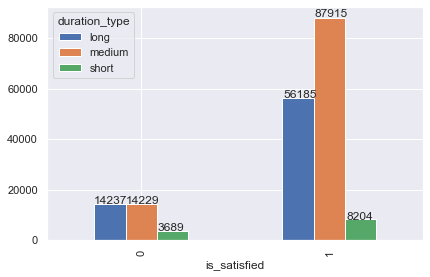

In [94]:
satisfied_duration = pd.crosstab(survey_data['is_satisfied'], survey_data['duration_type'])
ax = satisfied_duration.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

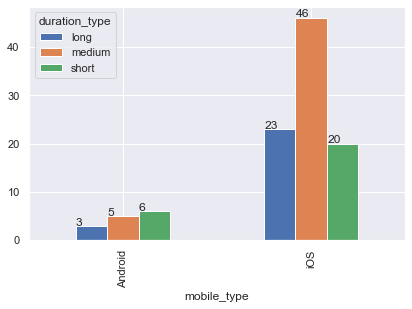

In [95]:
mobile_type_duration = pd.crosstab(devices['mobile_type'], devices['duration_type'])
ax = mobile_type_duration.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

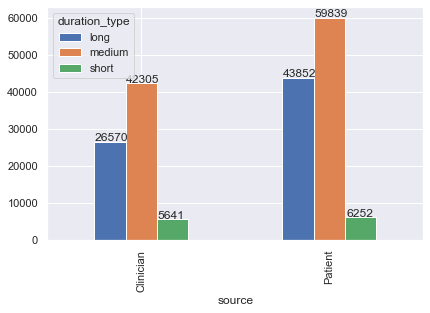

In [96]:
source_duration = pd.crosstab(survey_data['source'], survey_data['duration_type'])
ax = source_duration.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [97]:
source_duration

duration_type,long,medium,short
source,,,
Clinician,26570,42305,5641
Patient,43852,59839,6252


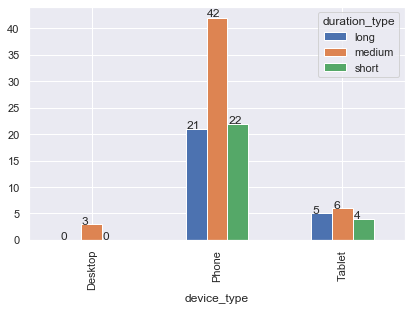

In [98]:
device_type_duration = pd.crosstab(devices['device_type'].astype('str'), devices['duration_type'])
ax = device_type_duration.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [99]:
satisfied_devices = devices[devices['is_satisfied'] == 1]
unsatisfied_devices = devices[devices['is_satisfied'] == 0]
build_version_3 = devices[devices['build_version'] < 4.0]

In [106]:
#build_version wordcloud
build_version_3['feedback'] = build_version_3['feedback'].apply(lambda x: remove_punctuation(x))
feedback_2 = build_version_3['feedback'].astype('string')

D:\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


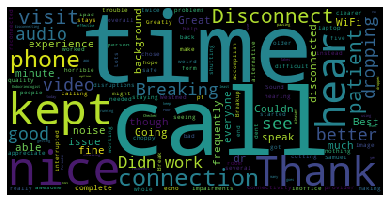

In [107]:
wordcloud = WordCloud().generate(' '.join(feedback_2))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Visit Disconnection Analysis**

In [137]:
#number of disconnections, join survey_data on visit_id and participant_type
#survey data left join participant visit on survey_data.visit_id = participant_visit.visit_id AND 
#survey_data.participant_type = participant_visit.participant_type
#top 10 satisfied feedback, unsatisfied feedback - percentages of occurences - define categories of issues, row by row write a function that takes in feedback -> output the category of problem

#phase 1 - define functions that will classify feedback text - audio, video, connection issues (product, experience) 
#phase 2 - define methods to classify categories through what the data tells us(N-grams, value_counts)

In [138]:
participant_data = pd.read_csv(r'G:\Shared drives\MediSprout\vishaal\MediSprout-notebooks\NLP Analysis\v2md_v2_1_participant_visit.csv')
participant_data

D:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,visit_id,participant_uuid,participant_type,created_on,updated_on,provider_id,patient_id,user_id,room_entered_at,room_exited_at,duration,on_call,numb_times_connected,video_device,wait_time
0,7367,16001,df93c824-ac12-4175-bf38-1c8fbba7c236,Pt,2018-03-06 15:59:09,2018-03-06 15:59:09,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
1,7368,16002,f2f179ab-b711-44f6-8871-285c40770bca,Pt,2018-03-06 16:02:12,2018-03-06 16:02:12,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
2,7369,16003,c6eed1e6-185d-4602-947b-cf82f9fcf8bf,Pt,2018-03-06 16:04:03,2018-03-06 16:04:03,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
3,7370,16004,ZqIjSqbB0,Pt,2018-03-07 06:07:33,2018-03-07 06:07:33,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
4,7371,16005,a16a3edf,Pt,2018-03-07 13:37:33,2018-03-07 13:37:33,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486319,493786,269712,rXFyTyyJGb8nPQmGtEX2ilBzT9K7BJ7X4HDbcdSh4eFwv,Pt,2020-10-07 23:06:19,2020-10-07 23:06:19,NaN,276024.0,NaN,2020-10-07 23:06:19,2020-10-07 23:19:45,806,0,1,ANDROID,838
486320,493787,269714,hFaU8cvnPl0Lo5rIrJA3jJBLb8lqc3hN71gpUSlTiNktB,Dr,2020-10-07 23:16:29,2020-10-07 23:16:29,67569.0,102745.0,NaN,2020-10-07 23:16:28,2020-10-08 00:17:53,3685,0,1,IOS,88
486321,493788,269714,dQI3EEOWZFDJwQWMJnixqPpBsJYjk1dOQhkfLP7gxOdoC,Pt,2020-10-07 23:16:37,2020-10-07 23:16:37,NaN,102745.0,NaN,2020-10-07 23:16:36,2020-10-08 00:17:50,3673,0,1,CHROME,26
486322,493789,269715,8qbnegBhz9Z8d7hgPXUgOafyBZ8WRUVb7jtlAg77CYTZF,Dr,2020-10-08 00:30:50,2020-10-08 00:30:50,68742.0,265217.0,NaN,2020-10-08 00:30:49,NaN,0,1,1,CHROME,49


In [139]:
participant_survey = survey_data.merge(participant_data, on='visit_id', how='left')
participant_survey

,id_x,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id_x,created_on_x,updated_on_x,...,provider_id,patient_id_y,user_id,room_entered_at,room_exited_at,duration,on_call,numb_times_connected,video_device,wait_time
0,1,Clinician,17486,1,NaN,NaN,676,647.0,2019-03-19 17:56:05,2019-03-19 17:56:05,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
1,2,Clinician,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:56,2019-03-20 17:35:56,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
2,3,Patient,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:57,2019-03-20 17:35:57,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
3,4,Patient,17490,0,NaN,NaN,237,87.0,2019-03-20 18:21:10,2019-03-20 18:21:10,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
4,5,Clinician,17490,0,NaN,shut down mid session,237,87.0,2019-03-20 18:21:38,2019-03-20 18:21:38,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350411,184455,Patient,316003,0,4.0,NaN,66404,215848.0,2020-11-16 22:59:35,2020-11-16 22:59:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350412,184456,Patient,316111,1,5.0,NaN,4045,305919.0,2020-11-16 22:59:56,2020-11-16 22:59:56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350413,184457,Patient,316100,1,4.0,NaN,65240,139736.0,2020-11-16 23:00:02,2020-11-16 23:00:02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350414,184458,Clinician,316113,1,4.0,NaN,4097,305937.0,2020-11-16 23:01:21,2020-11-16 23:01:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
participant_survey['created_on'] = pd.to_datetime(participant_survey['created_on_x'], format='%Y-%m-%d %H:%M:%S.%f')
participant_survey['created_on_date'] = participant_survey['created_on'].dt.date
participant_survey['months'] = pd.to_datetime(participant_survey['created_on'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m')

In [141]:
def set_intervals(row):
    disconnection = row['numb_times_connected']
    
    if disconnection == 0:
        return '0'
    elif disconnection == 1:
        return '1'
    elif disconnection == 2:
        return '2'
    elif disconnection == 3:
        return '3'
    elif disconnection == 4:
        return '4'
    elif disconnection > 5.0:
        return '5+'

In [142]:
participant_survey['disconnection_interval'] = participant_survey.apply(lambda row: set_intervals(row), axis=1)
disconnection_df = participant_survey.groupby('disconnection_interval')['feedback'].count().to_frame()
disconnection_df.assign(feedback_prop = disconnection_df['feedback']/disconnection_df['feedback'].sum())\
.assign(num_ratings = participant_survey.groupby('disconnection_interval')['rating'].count())\
.assign(ratings_prop = participant_survey.groupby('disconnection_interval')['rating'].count()/participant_survey.groupby('disconnection_interval')['rating'].count().sum())\
.assign(avg_rating = participant_survey.groupby('disconnection_interval')['rating'].mean()).reset_index()

,disconnection_interval,feedback,feedback_prop,num_ratings,ratings_prop,avg_rating
0,0,56984,0.736665,10304,0.152214,4.070070
1,1,16983,0.219549,48101,0.710565,4.488555
2,2,2235,0.028893,6342,0.093686,3.836802
3,3,703,0.009088,1815,0.026812,3.376309
4,4,260,0.003361,677,0.010001,3.282127
5,5+,189,0.002443,455,0.006721,3.048352


In [143]:
participant_survey[['months', 'disconnection_interval', 'numb_times_connected']].dropna().head(400)

,months,disconnection_interval,numb_times_connected
0,2019-03,0,0.0
1,2019-03,0,0.0
2,2019-03,0,0.0
3,2019-03,0,0.0
4,2019-03,0,0.0
5,2019-03,0,0.0
6,2019-03,0,0.0
7,2019-03,0,0.0
8,2019-03,0,0.0
9,2019-03,0,0.0


In [144]:
mom_disconnection = participant_survey.groupby(['months', 'disconnection_interval'])['visit_id', 'feedback'].count().reset_index()
#mom_disconnection.assign(feedback_prop = mom_disconnection['feedback']/mom_disconnection['feedback'].sum())
mom_disconnection

D:\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,months,disconnection_interval,visit_id,feedback
0,2019-03,0,21,7
1,2019-04,0,68,21
2,2019-05,0,78,11
3,2019-06,0,87,24
4,2019-07,0,75,32
5,2019-08,0,46,6
6,2019-09,0,82,12
7,2019-10,0,99,7
8,2019-11,0,59,9
9,2019-12,0,59,7


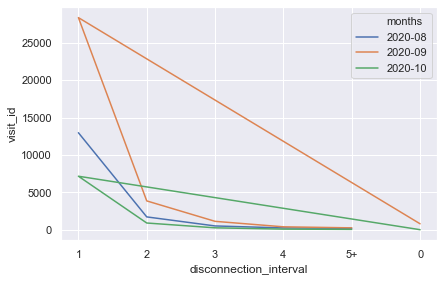

In [145]:
sns.lineplot(data=mom_disconnection.tail(17), x='disconnection_interval', y='visit_id', hue='months')

In [146]:
participant_survey.groupby('disconnection_interval')['visit_id'].count().to_frame().apply(lambda row: row/row.sum())

,visit_id
disconnection_interval,
0,0.822537
1,0.148172
2,0.019787
3,0.005779
4,0.002201
5+,0.001523


In [147]:
participant_survey['numb_times_connected'].value_counts()

0.0     269412
1.0      48532
2.0       6481
3.0       1893
4.0        721
5.0        318
6.0        148
7.0         75
8.0         70
9.0         38
10.0        26
11.0        22
14.0        19
13.0        15
16.0         9
21.0         9
19.0         8
12.0         8
15.0         7
20.0         6
17.0         5
18.0         5
28.0         5
24.0         4
23.0         4
25.0         3
26.0         3
27.0         3
29.0         2
35.0         2
31.0         1
22.0         1
32.0         1
Name: numb_times_connected, dtype: int64

In [148]:
#disconnections v rating - build a histogram of value counts
discon_rating = pd.crosstab(participant_survey['numb_times_connected'], participant_survey['rating'], \
                           margins=True, margins_name='Total', normalize='index')
discon_rating

rating,0.0,1.0,2.0,3.0,4.0,5.0
numb_times_connected,,,,,,
0.0,0.000097,0.092780,0.044449,0.095497,0.233987,0.533191
1.0,0.004345,0.027089,0.021226,0.071121,0.175443,0.700775
2.0,0.003311,0.157206,0.060706,0.089246,0.157206,0.532324
3.0,0.007713,0.256198,0.063361,0.115702,0.138843,0.418182
4.0,0.010340,0.262925,0.078287,0.103397,0.172821,0.372230
5.0,0.006897,0.400000,0.086207,0.110345,0.093103,0.303448
6.0,0.000000,0.369231,0.092308,0.092308,0.107692,0.338462
7.0,0.030769,0.369231,0.123077,0.046154,0.153846,0.276923
8.0,0.000000,0.343284,0.149254,0.044776,0.164179,0.298507


In [149]:
#disconnections v satisfaction

In [150]:
discon_satisfaction = pd.crosstab(participant_survey['numb_times_connected'], participant_survey['is_satisfied'], \
                           normalize='index').reset_index()[['numb_times_connected', 1]]
discon_satisfaction

is_satisfied,numb_times_connected,1
0,0.0,0.850808
1,1.0,0.767473
2,2.0,0.757599
3,3.0,0.736397
4,4.0,0.762829
5,5.0,0.710692
6,6.0,0.743243
7,7.0,0.746667
8,8.0,0.657143
9,9.0,0.605263


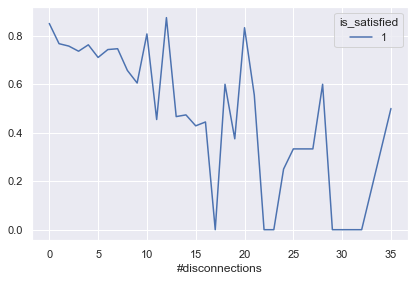

In [151]:
sns.set()
discon_sat_plot = discon_satisfaction.plot(x='numb_times_connected').set_xlabel('#disconnections')

In [152]:
#feedback by platform
devices.groupby('platform')['feedback'].value_counts().to_frame()

feedback
platform                    feedback                                                    
Apple iPad11,1              Image quality could be clearer                             1
Apple iPad4,4               nice on ipad                                               1
Apple iPad5,1               nice                                                       1
Apple iPad6,11              good video                                                 1
Apple iPad7,11              Phone call kept dropping  Had to call pt back f...         1
                            Phone calls keep pausing  Takes a few minutes t...         1
                            There were disruptions but overall we accomplis...         1
Apple iPad7,12              Lots of background noise could hear other peopl...         1
                            Sound kept cutting out otherwise good visit                1
Apple iPad7,3               Excellent way to communicate                               1
Apple iPad7,4               Horrendous feedback during the entire call                 1
Apple iPad7,5               Kristina is a huge help and I’m very grateful f...         1
                            Kristina is an amazing therapist I appreciate h...         1
                            Kristina is professional kind presents suggesti...         1
                            Kristina is wonderful I’m very grateful for wha...         1
                            Thank you                                                  1
                            Very helpful                                               1
Apple iPhone10,1            Great                                                      1
                            Had trouble staying on  Kept shutting off                  1
                            It started fine and worked for about a minute T...         1
                            Kept disconnecting                                         1
                            Only can do on phone Not laptop                            1
                            Very good                                                  1
                            Very satisfied                                             1
Apple iPhone10,2            Some times the audio is weird but I was able to...         1
                            The transmission was terrible and constantly sa...         1
                            Worked great                                               1
                            Yes we love DrGuerra he is great and my son lov...         1
Apple iPhone10,3             experience was good                                       1
                            Disconnected form phone several times                      1
                            So much background noise I couldn’t hear patient           1
                            We could not hear each other and the connection...         1
Apple iPhone10,4            Call got disconnected frequently                           1
Apple iPhone10,5            Echo from providers end                                    1
Apple iPhone10,6            Calls keep dropping Help                                   1
                            Dropped                                                    1
                            Dropped call                                               1
                            Dropped x5 in 15 min                                       1
                            Great                                                      1
                            Great to see and speak with my provider The bes...         1
Apple iPhone11,2            Didn’t work again                                          3
                            Connectivity issues                                        1
                            Couldn’t see the patient though he could see me...         1
                            His voice went in and out so I did have to stra

In [153]:
#feedback by build version
devices.groupby('build_version')['feedback'].value_counts().to_frame()

feedback
build_version feedback                                                    
1.0           Didn’t work again                                          3
              Breaking up                                                2
              Disconnect                                                 2
              Best visit ever                                            1
              Break up                                                   1
              Breaking up audio on the patients end                      1
              Breakup                                                    1
              Call got disconnected frequently                           1
              Call kept dropping                                         1
              Call kept getting dropped                                  1
              Connection cut out at least 10 times                       1
              Connection interrupted frequently                          1
              Connection problems  Going in and out                      1
              Connectivity issues                                        1
              Couldn’t see the patient though he could see me...         1
              Disconnect                                                 1
              Disconnected form phone several times                      1
              Great                                                      1
              Great to see and speak with my provider The bes...         1
              Had trouble staying on  Kept shutting off                  1
              Image quality could be clearer                             1
              It started fine and worked for about a minute T...         1
              It’s really bad                                            1
              Kept disconnecting                                         1
              Lots of background noise could hear other peopl...         1
              Not working                                                1
              Only can do on phone Not laptop                            1
              Periodic disconnects but streaming was better t...         1
              Phone call kept dropping  Had to call pt back f...         1
              Phone calls keep pausing  Takes a few minutes t...         1
              Poor connection                                            1
              So much background noise I couldn’t hear patient           1
              Some times the audio is weird but I was able to...         1
              Thank you Westmed thank you dr dent This was aw...         1
              Thank you for everyone’s help                              1
              Thank you so much dr Samuel  Greatly appreciate...         1
              The patient could not hear me and also the vide...         1
              There were disruptions but overall we accomplis...         1
              We could not hear each other and the connection...         1
              very choppy connection but better than nothing ...         1
              video goes in and out she could not hear me eve...         1
              yes it was very effective and it was a pleasant...         1
1.2           Sound kept cutting out otherwise good visit                1
3.8           nice                                                       4
              nice experience                                            1
3.9            experience was good                                       1
              Thank you                                                  1
              good video                                                 1
              nice                                                       1
              nice calling                                               1
              nice on ipad                                               1
4.0           Lalit check for version number                             1
              No

In [154]:
#satisfaction percentage per build version
devices.groupby('build_version')['is_satisfied'].value_counts(normalize=True).to_frame()

is_satisfied
build_version is_satisfied              
1.0           1                 0.586957
              0                 0.413043
1.2           1                 1.000000
3.8           1                 1.000000
3.9           1                 1.000000
4.0           1                 1.000000
4.1           0                 0.500000
              1                 0.500000
4.3           1                 1.000000
4.4           1                 0.875000
              0                 0.125000
4.5           1                 0.666667
              0                 0.333333
4.6           1                 1.000000
4.7           1                 0.625000
              0                 0.375000
7.8           1                 1.000000
8.2           0                 0.500000
              1                 0.500000
8.4           1                 1.000000
9.2           1                 1.000000

In [155]:
#feedback by duration
devices.groupby('n_minute_duration')['feedback'].value_counts().to_frame()

feedback
n_minute_duration feedback                                                    
0.0000            nice                                                       4
                  Great                                                      1
                  Horrendous feedback during the entire call                 1
                  Squeaking during call\nGetting on the cal for p...         1
                  The transmission was terrible and constantly sa...         1
                  good video                                                 1
                  nice experience                                            1
                  nice on ipad                                               1
1.7333            It started fine and worked for about a minute T...         1
                  It’s really bad                                            1
                  Not working                                                1
1.8667            Best visit ever                                            1
                  Breaking up audio on the patients end                      1
2.0333            good                                                       1
                  nice                                                       1
                  nice                                                       1
                  nice experience  on android                                1
2.5167            Lalit check for version number                             1
2.6000            Break up                                                   1
                  Breakup                                                    1
3.1000            Didn’t work again                                          2
3.8167            A little garbled at times but I could hear the ...         1
3.9333            Yes we love DrGuerra he is great and my son lov...         1
4.1000            Great                                                      1
4.4500            His voice went in and out so I did have to stra...         1
4.6000            Kept disconnecting                                         1
4.7500            Choppy feed                                                1
5.4167            Dropped call                                               1
5.5000            Didn’t work again                                          1
5.6167            Connection problems  Going in and out                      1
6.0000            Breaking up                                                2
6.1500            Echo from providers end                                    1
6.2833            Couldn’t see the patient though he could see me...         1
6.4333            Call kept getting dropped                                  1
6.5833            very choppy connection but better than nothing ...         1
6.6000            Kristina is wonderful I’m very grateful for wha...         1
7.0167            Phone calls keep pausing  Takes a few minutes t...         1
7.3500            Very good                                                  1
7.4333             experience was good                                       1
                  nice calling                                               1
                  nice experience                                            1
7.7833            Thank you so much dr Samuel  Greatly appreciate...         1
7.9667            Phone call kept dropping  Had to call pt back f...         1
8.0500            Thank you for everyone’s help                              1
8.7167            Didn’t work                                                1
                  Still not working                                          1
9.3167            Lots of background noise could hear other peopl...         1
10.0667           Periodic disconnects but streaming was better t...         1
10.5167           nice                                                       1
10.5500           Disconnected form phone

In [156]:
devices['n_minute_duration'].describe()

count    103.000000
mean      14.392391
std       15.651898
min        0.000000
25%        3.875000
50%        9.316700
75%       18.800000
max       71.183300
Name: n_minute_duration, dtype: float64